In [9]:
library(rugarch)
library(xts)
library(ggplot2)
library(plotly)

Loading required package: parallel


Attaching package: 'rugarch'


The following object is masked from 'package:stats':

    sigma


Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout




In [7]:
# install.packages("rmgarch")

In [10]:
# Inflation
data <- read.csv("output\\inflationLags.csv",header=TRUE, sep=";", row.names='date')
TSdata <- as.xts(data, order.by=as.Date(rownames(data)))#,"%m/%d/%Y"))
inf <- TSdata[,3]["1993/2021"]

In [11]:
# External Controls
cont <- read.csv("output\\controls_base.csv",header=TRUE, sep=',', row.names='date')
TScont <- as.xts(cont, order.by=as.Date(rownames(cont),"%m/%d/%Y"))#,"%m/%d/%Y""))

In [22]:
TScont

           core_cpiUS      energy          food     ext_gdp       imp_us
1993-01-01  3.4458994   2.2587506  -2.526322103 -0.23727485   0.31914894
1993-02-01  3.5763411   5.7143945  -3.016986252 -0.19720459   0.21276596
1993-03-01  3.3584647  10.1274418   0.614147540 -0.04659283   0.85197018
1993-04-01  3.4859877   4.9568680   4.504584551  0.02815052   1.70940171
1993-05-01  3.4059945  -1.7031071   3.413074851  0.14093807   1.59574468
1993-06-01  3.3990483  -9.8709066   3.034975064  0.07889131   0.21097046
1993-07-01  3.1842818 -11.6413040   2.648039710 -0.13435683  -0.83945435
1993-08-01  3.3130494 -10.0328454  -2.011740841 -0.12176310  -1.35841170
1993-09-01  3.2410533 -15.3719036  -2.097450623 -0.08159135  -1.45985401
1993-10-01  3.0913978 -15.0600954   1.054648446 -0.14750510  -1.75983437
1993-11-01  3.1501340 -13.9229099   4.180322286 -0.25115388  -1.66666667
1993-12-01  3.1417112 -18.2552299   8.323044537 -0.34731780  -0.95338983
1994-01-01  2.9313791 -12.5856376   8.073549044 -0.

General steps -------------
Three steps:
 1. ugarchspec() specify the GARCH model to use (mu, variance and distriburion of e)
 2. ugarchfit() Estimate the GARCH model specified in 1 on the time series.
 3. ugarchforecast(): use the GARCH model to make volatility predictions for t+1

GARCH(1,1), Constant Mean

In [12]:
# Constant mean standard GARCH(1,1) model -----
garchspec <- ugarchspec(mean.model=list(armaOrder = c(0,0)),
                        variance.model = list(model='sGARCH'),
                        distribution.model = 'norm')

garchfit <- ugarchfit(data = inf, spec = garchspec)

garchforercast <- ugarchforecast(fitORspec = garchfit, n.ahead = 5)

# Methods 
# Coefficients
garchcoef <- coef(garchfit)

# Unconditional Variance
garchuncvar <- uncvariance(garchfit)

# Predicted Mean
garchmean <- fitted(garchfit)

# Predicted volatility
garchvol <- sigma(garchfit)

# for predictions
# volatility prediction
volpred <- sigma(garchforercast)
# mean pred
meanpred <- fitted(garchforercast)

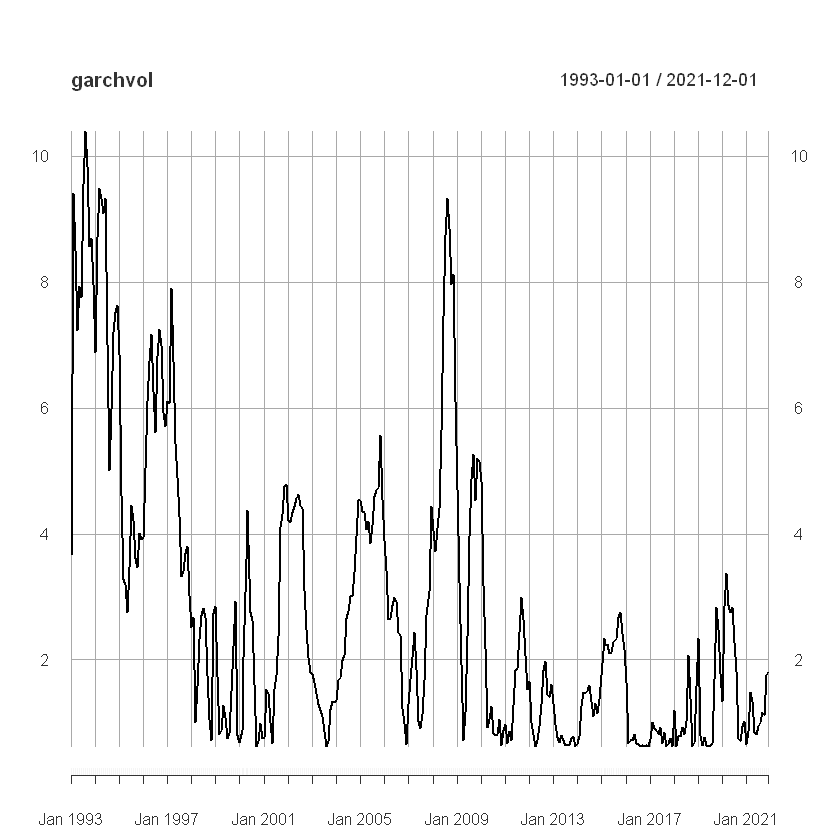

In [14]:
plot(garchvol)

In [65]:
write.csv(garchvol,'output\\garchvol.csv')

GARCH(1,1), ARIMA(1,1) Mean

In [17]:
# With ARMA(1,1) mean model

garchspec2 <- ugarchspec(mean.model=list(armaOrder = c(1,1)),
                        variance.model = list(model='sGARCH'),
                        distribution.model = 'std')

garchfit2 <- ugarchfit(data = inf, spec = garchspec2)

garchforercast2 <- ugarchforecast(fitORspec = garchfit, n.ahead = 5)


In [18]:
# Methods 
# Coefficients
garchcoef2 <- coef(garchfit2)

# Unconditional Variance
garchuncvar2 <- uncvariance(garchfit2)

# Predicted Mean
garchmean2 <- fitted(garchfit2)

# Predicted volatility
garchvol2 <- sigma(garchfit2)


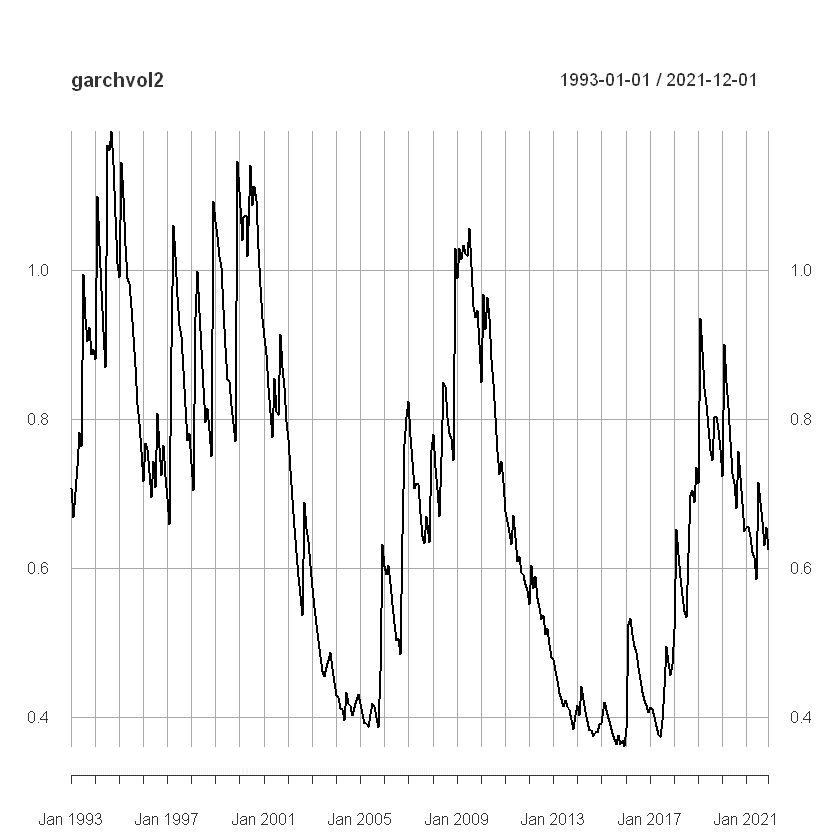

In [20]:
plot(garchvol2)

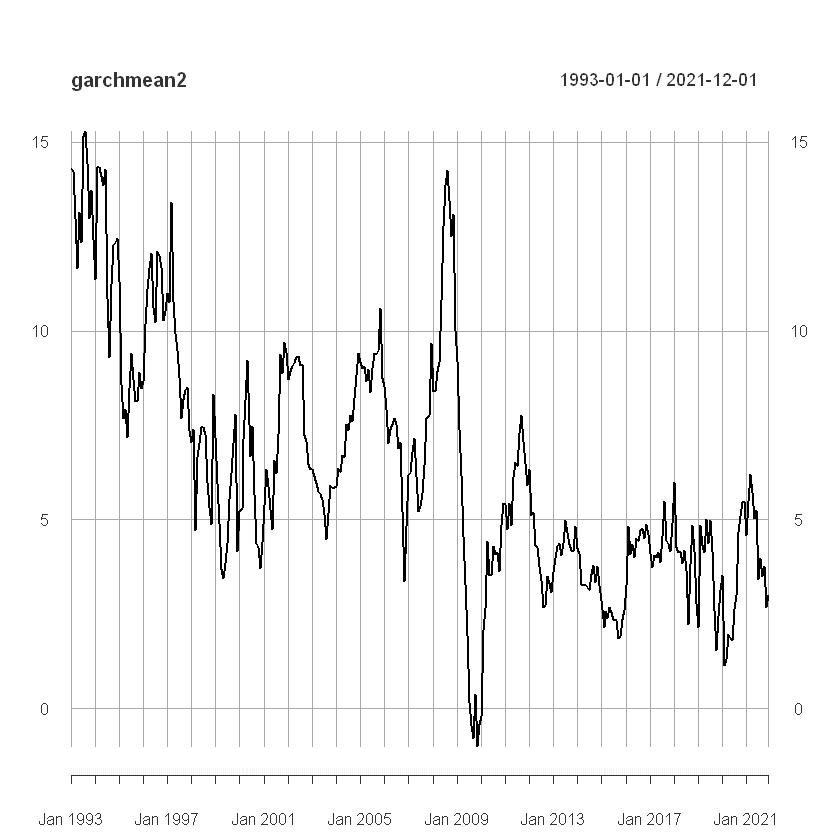

In [21]:
plot(garchmean2)

GARCH(1,1)/ARIMA(1,1) with controls in the volatility process

In [125]:
start(TSdata['1993/2021'])
start(inf)
start(TScont)

[1] "1993-01-01"

[1] "1993-01-01"

[1] "1993-01-01"

In [137]:
colnames(TSdata)

[1] "CPI"       "target"    "v_cpi"     "fao_Index" "IT_reg"    "pce"      
 [7] "core_pce"  "cpiUS"     "pet"       "l1"        "l3"        "l6"       
[13] "l12"       "l18"       "l24"

In [146]:
# TScont['1993/2021']

Complete period

In [148]:
# With ARMA(1,1) mean model

garchspec3 <- ugarchspec(mean.model=list(armaOrder = c(1,1), external.regressors=as.matrix(TScont['1993/2021'])),
                        variance.model = list(model='sGARCH', external.regressors=TSdata['1993/2021'][,10]),
                        distribution.model = 'std')

garchfit3 <- ugarchfit(data = inf, spec = garchspec3)
garchfit3



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu      6.849953    1.439220  4.759491 0.000002
ar1     0.958050    0.022626 42.342790 0.000000
ma1     0.362770    0.049360  7.349417 0.000000
mxreg1 -0.323816    0.189225 -1.711270 0.087031
mxreg2 -0.009349    0.003240 -2.885568 0.003907
mxreg3  0.029422    0.007799  3.772347 0.000162
mxreg4 -0.076219    0.082880 -0.919638 0.357762
mxreg5  0.120415    0.032108  3.750283 0.000177
omega   0.013982    0.012357  1.131469 0.257858
alpha1  0.102251    0.042346  2.414638 0.015751
beta1   0.870099    0.033255 26.164420 0.000000
vxreg1  0.000000    0.002183  0.000005 0.999996
shape   4.334350    1.005960  4.308672 0.000016

Robust Standard Err

Past inflation (vxreg1, first lag) significant in volatility process at 5% level in robust stardad errors and at 10% level normal stardard errors.

Pre IT period

In [142]:
# With ARMA(1,1) mean model

garchspec31 <- ugarchspec(mean.model=list(armaOrder = c(1,1)),
                        variance.model = list(model='sGARCH', external.regressors=TSdata['1993/2004'][,10]),
                        distribution.model = 'std')

garchfit31 <- ugarchfit(data = inf['1993/2004'], spec = garchspec31)
garchfit31


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu     14.258780    0.617123 23.10524 0.000000
ar1     0.987674    0.010257 96.29125 0.000000
ma1     0.400380    0.070613  5.67009 0.000000
omega   0.000000    0.000474  0.00000 1.000000
alpha1  0.083388    0.047118  1.76977 0.076766
beta1   0.900442    0.047369 19.00900 0.000000
vxreg1  0.000916    0.001980  0.46277 0.643528
shape   4.398973    1.508682  2.91577 0.003548

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu     14.258780    0.177030 80.544536 0.000000
ar1     0.987674    0.011315 87.287096 0.000000
ma1     0.400380    0.063853  6.270366 0.000000
omega   0.000000    0.000005  0.000035 0.999972
alph

Past inflation is not significant in the volatility process in the pre-IT period

In [141]:
garchspec32 <- ugarchspec(mean.model=list(armaOrder = c(1,1)),
                        variance.model = list(model='sGARCH', external.regressors=TSdata['2005/2021'][,10]),
                        distribution.model = 'std')

garchfit32 <- ugarchfit(data = inf['2005/2021'], spec = garchspec32)
garchfit32


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error    t value Pr(>|t|)
mu      8.959054    0.446482  20.065900 0.000000
ar1     0.991751    0.009806 101.136649 0.000000
ma1     0.361678    0.063699   5.677921 0.000000
omega   0.000000    0.000428   0.000019 0.999985
alpha1  0.105040    0.049563   2.119335 0.034062
beta1   0.853952    0.051686  16.521836 0.000000
vxreg1  0.003426    0.002124   1.613197 0.106702
shape   9.608576    6.686157   1.437085 0.150694

Robust Standard Errors:
        Estimate  Std. Error    t value Pr(>|t|)
mu      8.959054    0.065585 136.603123 0.000000
ar1     0.991751    0.009811 101.081202 0.000000
ma1     0.361678    0.048375   7.476546 0.000000
omega   0.000000    0.000028  

Past inflation is significant in the volatility process in the IT period

In [24]:
# Methods 
# Coefficients
garchcoef3 <- coef(garchfit3)

# Unconditional Variance
garchuncvar3 <- uncvariance(garchfit3)

# Predicted Mean
garchmean3 <- fitted(garchfit3)

# Predicted volatility
garchvol3 <- sigma(garchfit3)


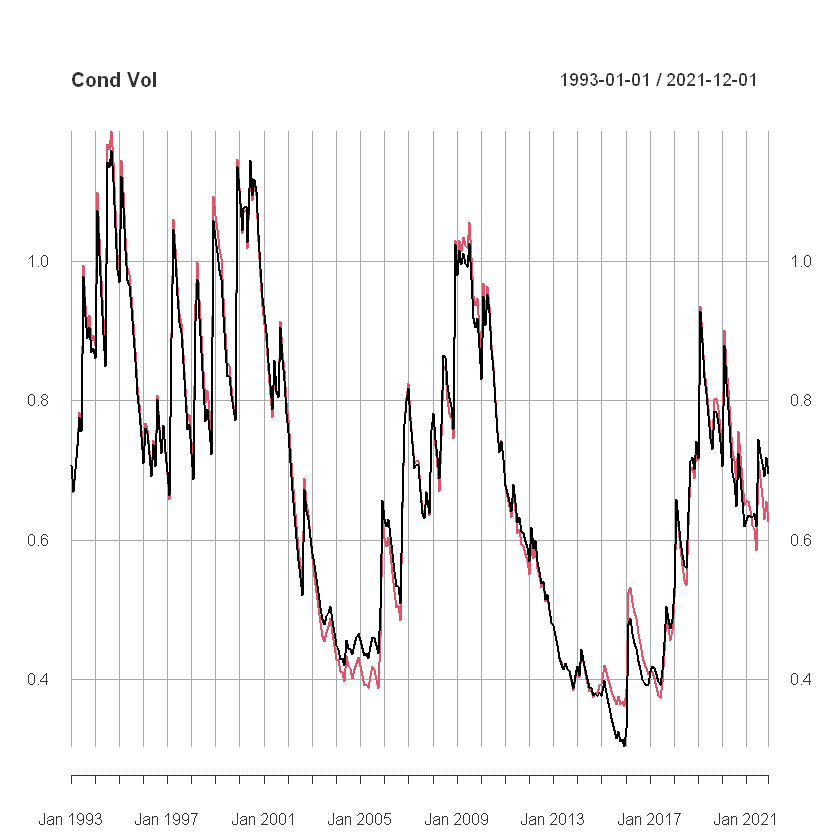

In [61]:
plot(merge(garchvol3, garchvol2), lwd = 2, main='Cond Vol')
# addLegend('bottomleft', legend.names = c("With Controls", "No Controls"), lty = c(1,1))#, mex = 0.6, cex = 0.8)

In [72]:
garchfit3


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error    t value Pr(>|t|)
mu     14.309410    0.631482  22.660056 0.000000
ar1     0.996978    0.004343 229.569267 0.000000
ma1     0.376598    0.048568   7.754004 0.000000
omega   0.009703    0.043634   0.222366 0.824029
alpha1  0.106673    0.058118   1.835440 0.066441
beta1   0.876094    0.042021  20.848897 0.000000
vxreg1  0.000000    0.021743   0.000001 0.999999
vxreg2  0.000138    0.000516   0.266647 0.789741
vxreg3  0.000000    0.001189   0.000000 1.000000
vxreg4  0.000000    0.005918   0.000003 0.999997
vxreg5  0.000000    0.003227   0.000027 0.999979
shape   5.550418    2.436912   2.277644 0.022748

Robust Standard Errors:
        Estimate  Std. Error  